Epoch 0: MAE = 10063.6099
Epoch 10: MAE = 7393.7008
Epoch 20: MAE = 5511.9589
Epoch 30: MAE = 4276.8407
Epoch 40: MAE = 3549.4263
Epoch 50: MAE = 3155.9205
Epoch 60: MAE = 2938.5903
Epoch 70: MAE = 2818.9097
Epoch 80: MAE = 2756.3085
Epoch 90: MAE = 2721.8445
Epoch 100: MAE = 2702.7201
Epoch 110: MAE = 2691.8746
Epoch 120: MAE = 2685.8910
Epoch 130: MAE = 2682.8259
Epoch 140: MAE = 2681.0614
Epoch 150: MAE = 2679.9643
Epoch 160: MAE = 2679.3627
Epoch 170: MAE = 2678.9991
Epoch 180: MAE = 2678.7528
Epoch 190: MAE = 2678.5743


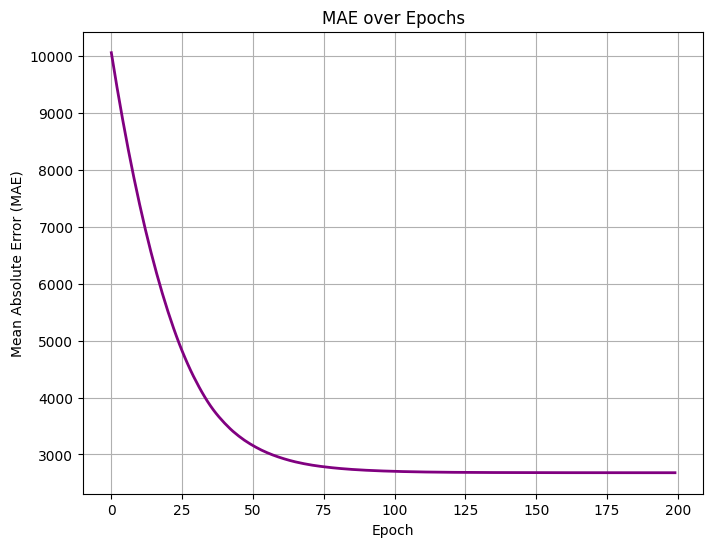

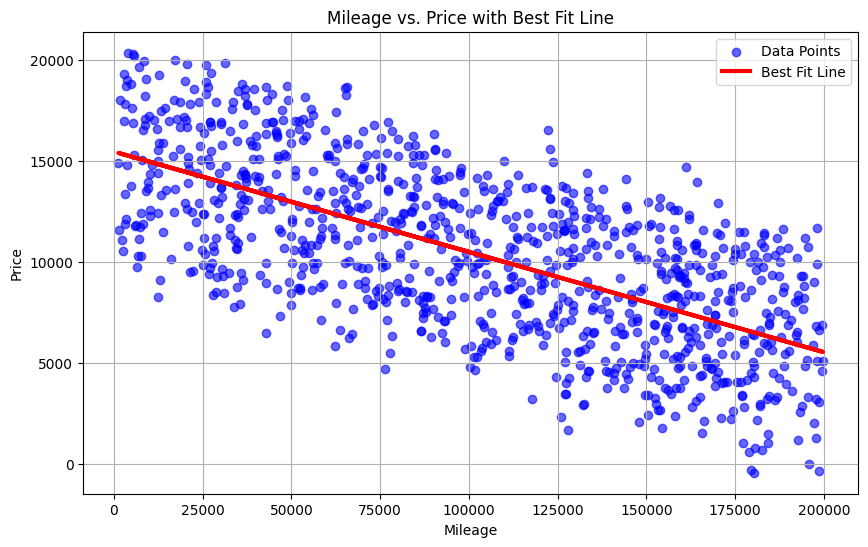

Final MAE: 2678.4875


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('car_price_data.csv')

# Convert to numeric, drop NaNs, and handle missing/invalid values
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Mileage', 'Price', 'Age'])

# Limit to the first 1000 rows
df = df.iloc[:1000]

# Select only 'Mileage' as the feature and 'Price' as the target
X = df[['Mileage']].values  # Feature (Mileage)
y = df['Price'].values      # Target (Price)

# Normalize the feature (standardization)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std  # Standardized mileage values

# Add a bias term (intercept)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize weights randomly
np.random.seed(42)
theta = np.random.randn(X_normalized.shape[1])

# Define the MAE and prediction functions
def compute_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def predict(X, theta):
    return X @ theta

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate=0.01, batch_size=32, epochs=100):
    m = len(y)
    loss_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle the data
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute predictions and gradient
            y_pred_batch = predict(X_batch, theta)
            gradient = (X_batch.T @ (y_pred_batch - y_batch)) / batch_size

            # Update weights (theta)
            theta -= learning_rate * gradient

        # Calculate and store the loss (MAE)
        y_pred_full = predict(X, theta)
        loss = compute_mae(y, y_pred_full)
        loss_history.append(loss)

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: MAE = {loss:.4f}')

    return theta, loss_history

# Train the model using mini-batch gradient descent
theta_final, loss_history = mini_batch_gradient_descent(X_normalized, y, theta, learning_rate=0.001, batch_size=32, epochs=200)

# Plot loss history (MAE over time)
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_history)), loss_history, color='purple', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE over Epochs')
plt.grid(True)
plt.show()

# Denormalize the Mileage feature for plotting
X_denorm = X_normalized[:, 1] * X_std + X_mean  # Convert back to original Mileage scale

# Make predictions for the best-fit line
y_pred = predict(X_normalized, theta_final)

# Plot data points (Mileage vs Price) and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X_denorm, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_denorm, y_pred, color='red', label='Best Fit Line', linewidth=3)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the final MAE
final_mae = compute_mae(y, y_pred)
print(f'Final MAE: {final_mae:.4f}')
